<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Electromagnetics/owlmPy_FDTD_1D_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

owlmPyは、有限差分時間領域法を使用した磁気光学活性を持つ構造化デバイス内の電磁波伝搬のモデリングとシミュレーションのためのPythonパッケージです

https://github.com/mojv/owlmPy

Docs: https://www.overleaf.com/read/pyycjpvfvmqr

In [1]:
!pip install owlmPy

In [0]:
import numpy as np
import owlmPy as ow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import io
import base64
from IPython.display import HTML

In [0]:
ds = np.array([134,134,134])
eps = np.array([1, 1 , 1])
mus = np.array([6.4009,2.25,1.9044])
lamda_min = 250
lamda_max = 1000
Ny = 40 # number of cells in a wave lenght
Nd = 4 # number of cells in the smallest device
offset= 3+100
nbc = 1
epsrc = 1
musrc = 1
src_ini=2
NFREQ = 1000;

model = ow.fdtd_1d(ds,eps,mus,lamda_min,lamda_max,Ny,Nd,offset,nbc,epsrc,musrc,src_ini,NFREQ)

In [0]:
frames=500 # Number of frames for the animation (will slow the computing, if omitted the computing will be the fastest)
model.run_sim(fr=500)

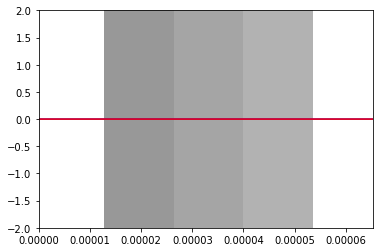

In [5]:
#Create Animation
model.create_ani('animation.mp4')

video = io.open('animation.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))


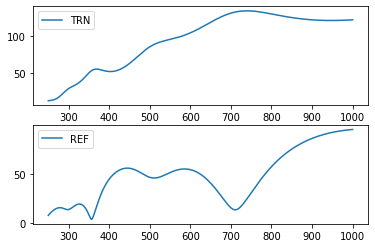

In [6]:
#Ploting Fourier tranform for reflection and trasmition

lambd = (model.c0/model.FREQ)*(10**7)
lambd= np.flip(lambd, 0)

plt.subplot(211)
plt.plot(lambd, np.flip(np.absolute(model.TRN),0), label='TRN')
plt.legend()
plt.subplot(212)
plt.plot(lambd, np.flip(np.absolute(model.REF),0), label='REF')
plt.legend()

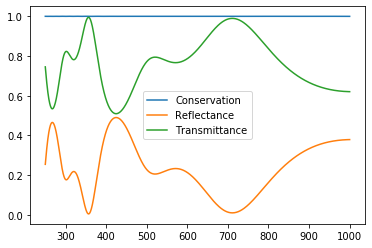

In [7]:
#Ploting reflectance vs transmittanc vs transmittance

plt.plot(lambd, np.flip(model.CON,0), label='Conservation')
plt.plot(lambd, np.flip(model.NREF,0), label='Reflectance')
plt.plot(lambd, np.flip(model.NTRN,0), label='Transmittance')
plt.legend()